__Content__

- [Objectives](#objectives)

- [Review](#review)

- [Regularization Techniques](#regularization_techniques)

- [Questions](#questions)

- [Appendix](#appendix)

## Objectives 
<a name="objectives"></a>

- Understand what is regularization

- Understand the effect of hyper-parameter $\alpha$ in Ridge and Lasso.

- Understand the similarities and differences between Lasso-Ridge-Linear models.

- Apply Lasso and Ridge with sklearn


### Review
<a name="review"></a>



[__Overfitting - Underfitting__](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

<img src="underfitting_overfitting.png" alt="Bias-Variance" style="width: 500px;"/>



[__Bias - Variance Trade-Off__](http://scott.fortmann-roe.com/docs/BiasVariance.html)

<img src="bias_variance_trade_off.png" alt="Bias-Variance" style="width: 400px;"/>



## Preliminaries - L1 and L2 Norms

Suppose we have a vector:  

$$
  \begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           x_{3} \\
           x_{4}
         \end{bmatrix}
  \end{align}
$$

Then the square of the "__L2-norm__" of this vector is given by:

$$ \| X \|^{2}_{2} = x_{1}^{2} + x_{2}^{2} + x_{3}^{2} +x_{4}^{2} = \sum_{i=1}^{4} x_{i}^{2}$$


In [1]:
## using numpy:
import numpy as np
X = np.array([12, -25, 10, -10])

##L2 norm of X
np.sqrt(sum(X*X))

31.12876483254676

Similarly the "__L1-norm__" of the X is given as:

$$ \| X \|_{1} = \lvert x_{1}\rvert + \lvert x_{2}\rvert + \lvert x_{3}\rvert + \lvert x_{4}\rvert = \sum_{i=1}^{4} \lvert x_{i}\rvert $$

In [2]:
X = np.array([2, 0, 1, -1])
l1_norm = sum(np.abs(X))
l1_norm
l2_norm = np.sqrt(sum(X*X))

print(l2_norm, l1_norm)

2.449489742783178 4


In two dimensions: If $$
  \begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
         \end{bmatrix}
  \end{align}
$$

$$\text{(Lasso) ---->} \| X \|_{1} = \lvert x_{1}\rvert + \lvert x_{2}\rvert = \sum_{i=1}^{2} \lvert x_{i}\rvert $$

$$\text{(Ridge) ---->} \| X \|_{2}^{2} = \lvert x_{1}\rvert^{2} + \lvert x_{2}\rvert^{2} = \sum_{i=1}^{2} \lvert x_{i}\rvert^{2} $$

<img src="norms.png" alt="Lasso-Lambda" style="width: 400px;" class = "center"/>

Examples: Note that if we have two vectors $ \begin{align}
    X &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           x_{3} \\
           x_{4}
         \end{bmatrix}
  \end{align}$   and $ \begin{align}
    Y &= \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           y_{3} \\
           y_{4}
         \end{bmatrix}
  \end{align}$ we can subtract them and get a new vector: $ \begin{align}
    X - Y &= \begin{bmatrix}
           x_{1} - y_{1} \\
           x_{2} - y_{2}\\
           x_{3} - y_{3}\\
           x_{4} - y_{4}
         \end{bmatrix}
  \end{align}$. Then now we can calculate the __L1-norm__ of the new vector $X-Y$ as:
  
  $$ \| X-Y \|_{1} = \lvert x_{1} - y_{1} \rvert + \lvert x_{2} - y_{2} \rvert + \lvert x_{3} - y_{3} \rvert + \lvert x_{4} - y_{4} \rvert = \sum\limits_{i=1}^{4} \lvert x_{i} - y_{i} \rvert$$
  
  Similarly the __L2-norm__ of this vector is given by:
  
  $$ \| X-Y \|_{2}^{2} =  (x_{1} - y_{1})^{2} + (x_{2} - y_{2} )^{2} + ( x_{3} - y_{3} )^{2} + ( x_{4} - y_{4} )^{2} =\sum\limits_{i=1}^{4} ( x_{i} - y_{i} )^{2} $$
  
  

### Linear Regression Recap

#### Linear Model

$$ Y = w_{0} + w_{1}X_1 + w_{2}X_{2} + \cdots + w_{p}X_{p} + \varepsilon $$

 - We train model to understand the paramaters $w_{i}$ (Coefficients) 

 - $X_{i}$ 's are columns of the datasets (Features)

#### Predictions

- Once the coefficients are estimated (learned): We can make predictions for an observation (row) in our dataset:

 $$ \hat{y}_{i} =  \hat{w}_{0} + \hat{w}_{1}X_{i1} + \hat{w}_{2}X_{i2} + \cdots + \hat{w}_{p}X_{ip}$$
 
 - $\hat{w}_{i}$'s are estimated coefficients
 - $X_{i1}, X_{i2}, \cdots, X_{ip}$ - i'th row in the dataset (with p-columns)

 
 Therefore for each observations (rows) errors are given by:
 
 $$ e_{i} = y_{i} - \hat{y}_{i} $$
 
 As a result, the Residual Sum of Squares can be expressed as:
 
 $$ RSS(\hat{w}_{0}, \cdots, \hat{w}_{p}) = \sum\limits_{i=0}^{N} e_{i}^{2}$$


Usually the cost functions are denoted with the capital letter $J$
 
 
 $$ J(\hat{w}_{0}, \cdots, \hat{w}_{p}) = \sum\limits_{i=0}^{N} (y_{i} - \hat{w}_{0} - \hat{w}_{1}X_{i1} - \hat{w}_{2}X_{i2} - \cdots - \hat{w}_{p}X_{i_p})^{2} $$
 
 And this equation can be written in short hand as:
 
 $$ J(\boldsymbol{w}) = \| \boldsymbol{Y} - X \hat{w} \|_{2}^{2} $$

## Regularization

### Ridge regularization

Instead of minimizing $J(w)$ (least squares method), we will minimize:

$$ J_{\alpha}(\boldsymbol{w}) = J(\boldsymbol{w}) + \alpha\sum_{i=1}^{p} w_{i}^{2} $$



### Lasso regularization

Instead of minimizing $J(\boldsymbol{w})$, we will minimize:

$$ J_{\alpha}(\boldsymbol{w}) = J(\boldsymbol{w}) + \alpha\sum_{i=1}^{p}| w_{i} | $$


### Regularization Techniques

<a name="regularization_techniques"></a>


- Why?

    - Reduces complexity
    
    - Reduce the chance of overfitting.
    
    - Reduces model's variance at the expense of introducing small bias
    
    - Increases model's interprettability.
    





## An Example with Sklearn

In [3]:
## import libraries
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

### Loading data

In [4]:
# load data 
import pandas as pd
df = pd.read_csv('../data/Credit.csv', index_col = 0)

In [5]:
# let's see the head of the dataset
print(df.shape)
df.head()


(400, 11)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### A Brief Investigation of the Dataset

In [6]:
## checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [7]:
## let's see the number of categories in ethnicity
df.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [8]:
df.Gender.value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [9]:
df.Student.value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [10]:
df.Married.value_counts()

Yes    245
No     155
Name: Married, dtype: int64

### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "Balance"),
                                                df.Balance, 
                                                stratify = df.Married,
                                                random_state =42, test_size = 0.2)

### One Hot Encoding the Categorical Variables

In [12]:
## instantiate ohe
## note that in this case we know the categories very well.
## import
from sklearn.preprocessing import OneHotEncoder

## instantiate
ohe = OneHotEncoder(categories= [["Caucasian", "Asian", "African American"], ["Female", " Male"], ["No", "Yes"], ["Yes", "No"]],
                    drop = ["Caucasian", "Female", "No", "No"], sparse = False,)

## fit model (learn categories in train and plan how to convert them one hot encoded columns)
ohe.fit(X_train[['Ethnicity', "Gender", "Student", "Married"]])
## transform X_train data. Result is a numpy array.
categorical_train = ohe.transform(X_train[['Ethnicity', "Gender", "Student", "Married"]])
## concact the categorical variables with the rest of the data
train = np.hstack((X_train.select_dtypes(exclude = "object" ), categorical_train))

In [13]:
train.shape

(320, 11)

In [14]:
## note that we should make the similar transformation to the test data too.
## Remark: Never fit a transformer to your test data. Only transform!!
categorical_test = ohe.transform(X_test[['Ethnicity', "Gender", "Student", "Married"]])
test = np.hstack((X_test.select_dtypes(exclude = "object"), categorical_test))

In [15]:
test.shape

(80, 11)

In [16]:
ohe.get_feature_names()

array(['x0_Asian', 'x0_African American', 'x1_ Male', 'x2_Yes', 'x3_Yes'],
      dtype=object)

### Fitting a Linear Regression (Baseline)

In [17]:
## import 
from sklearn.linear_model import LinearRegression
## instantiate
lr = LinearRegression()
## fit 
lr.fit(train, y_train)
## predict
y_train_pred = lr.predict(train)

In [18]:
np.set_printoptions(suppress=True, precision=3)
lr.coef_

array([ -7.691,   0.181,   1.227,  15.466,  -0.671,  -1.419,   7.498,
        -2.283,   8.193, 433.656,  -5.428])

In [19]:
## R_squared score
lr.score(train,y_train)

0.9532149163845625

## Ridge Regression

In [20]:
## import
from sklearn.linear_model import Ridge
## instantiate
ridge = Ridge(alpha = 10, normalize = True) ## note that we should normalize/standardize data if you are using regularization
## fit
ridge.fit(train, y_train)
## predict
ridge_train_pred = ridge.predict(train)

In [21]:
## coefficients
ridge.coef_

array([ 0.421,  0.014,  0.207,  2.757, -0.059,  0.147,  1.417,  5.896,
       -3.954, 40.557,  0.194])

In [22]:
## score
ridge.score(train, y_train)

0.2595672954223692

## Lasso

In [37]:
## import
from sklearn.linear_model import Lasso
## instantiate
lasso = Lasso(alpha= 20, normalize= True)
## fit
lasso.fit(train, y_train)
## predict
lasso_train_pred = lasso.predict(train)
## coefficients
lasso.coef_

array([ 0.   ,  0.   ,  0.229,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,
       -0.   ,  0.   ,  0.   ])

In [38]:
## score

lasso.score(train,y_train)

0.12656179711435056

## Some Important Questions

### Questions



__Q.__ Should I do normalization for Lasso or Ridge?

A. Yes? Why?

__Q.__ When we know that Ridge and Lasso is better than vanilla linear regression?

A. High variation in your model --> Colinearity and too many variables.

__Q.__ How do we know whether we should choose Lasso or Ridge?

A. Most of the time they perform very similar but Lasso has the feature selection property, ridge doesn't have this.

__Q:__ How do we choose $\lambda$?

A. [sklearn gridsearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) for small models or random grid search for bigger models.

Or check-out: 

[Sklearn - LassoLarsIC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsIC.html)

[Sklearn - LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

## Miscellaneous

### Scaling data

In [39]:
## import
from sklearn.preprocessing import StandardScaler
## instantiate
scaler = StandardScaler()
## fit
scaler.fit(train)
## transform
scaled_train = scaler.transform(train) 
## Apply to test: !! Don't fit only transform
scaled_test = scaler.transform(test)

### Observing the effect of Regularization in Polynomial Regression

In [40]:
## import
from sklearn.preprocessing import PolynomialFeatures
## instantiate -- with desired degree. 
poly = PolynomialFeatures(degree=5)
## fit
poly.fit(scaled_train)
## transform
Xp_train = poly.transform(scaled_train)
## apply to test: !! Don't fit only transform
Xp_test = poly.transform(scaled_test)
print('After adding higher order terms: ', Xp_train.shape, Xp_test.shape)

After adding higher order terms:  (320, 4368) (80, 4368)


### Model Selection with Cross-Validation

In [41]:

## import
from sklearn.model_selection import cross_validate
## note that cross-validate is a function so we don't need to instantiate it


## chose a model for validate
lasso = Lasso(alpha = 10)

cv = cross_validate(estimator=lasso, X=Xp_train, y=y_train, cv = 5, return_estimator= True, return_train_score=True)

/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793460.4841875316, tolerance: 5257.7543359375
  positive)
/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1722184.8873494123, tolerance: 5440.306824609375
  positive)
/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1774828.4260413917, tolerance: 5469.784321484375
  positive)
/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

In [42]:
## cv is an dict object
print("Type of cv object is", type(cv))
print("Keys of cv object is", cv.keys())

Type of cv object is <class 'dict'>
Keys of cv object is dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])


In [43]:
print(cv['train_score'])

## note that even though the name is test_score this is in fact validation score
print(cv['test_score'])

[0.973 0.976 0.974 0.974 0.972]
[0.719 0.689 0.874 0.961 0.946]


In [30]:
def model_experiment(X, y, num_iter = 5, 
                     models = ['ols', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    """
    parameters:
    _________________________
    num_iter: int, number of times fit the models to test data each time with different splitting. 
    note that for each iteration we split the data random train and test parts.
    models: list, list of models that we want to use. Options are 'ols' for simple linear regression
    'ridge' for ridge regression and 'lasso' for lasso regression.
    alpha: float, alpha parameter for ridge and lasso algorithms. Recall that higher values of alpha 
    leads to more regularization.
    complexity: str, either 'simple' or 'polynomial'. We either use the original dataset or 
    a dataset with polynomial powers generated. 
    degree: int, if complexity is polynomial then degree is the degrees of polynomials to be generated.
    return: dict, it returns a dictionary with trained models as values and the 'complexity' parameters as keys.
    """
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #         print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    plt.ylim((0.50, 0.99))
    
    plt.legend()
    return sample_models


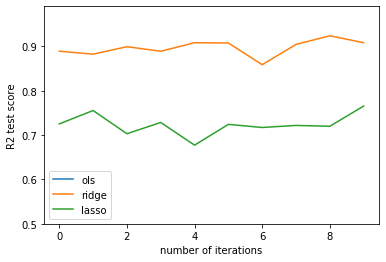

In [31]:
trained_models = model_experiment(scaled_train, y_train, num_iter=10, alpha = 100,
                                   models = ['ols', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 3)

__Your Turn__

- Try different values for alpha --> report your observations

- Change complexity = 'polynomial' and observe the change in the variance of the models. 

- Report your observations.


In [32]:
# After run model_experiment with complexity == 'polynomial'

lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso
lr_lasso.coef_

# compare them with OLS/Ridge models.


array([  0.   ,  -0.   ,   0.   , 282.634,   0.   ,  -0.   ,   0.   ,
         0.   ,   0.   ,  -0.   ,   0.   ,  -0.   ,  -0.   ,  -0.   ,
        -0.   ,   0.   ,  -0.   ,   0.   ,   0.   ,   0.   ,  -0.   ,
         0.   ,  -0.   ,   0.   ,   0.   ,   0.   ,  -0.   ,   0.   ,
         0.   ,   0.   ,  -0.   ,   0.   ,  -0.   ,   0.   ,   0.   ,
        -0.   ,   0.   ,   0.   ,   0.   ,  -0.   ,   0.   ,  -0.   ,
         0.   ,  -0.   ,  -0.   ,  -0.   ,   0.   ,  -0.   ,  -0.   ,
         0.   ,  -0.   ,  -0.   ,   0.   ,   0.   ,  -0.   ,  -0.   ,
        -0.   ,   0.   ,   0.   ,  -0.   ,  -0.   ,   0.   ,   0.   ,
         0.   ,  -0.   ,   0.   ,   0.   ,  -0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,  -0.   ,  -0.   ,  -0.   ,   0.   ,  -0.   ,
         0.   ,  -0.   ,   0.   ,   0.   ,   0.   ,  -0.   ,   0.   ,
         0.   ,   0.   ,  -0.   ,   0.   ,  -0.   ,   0.   ,   0.   ,
         0.   ,  -0.   ,   0.   ,   0.   ,   0.   ,  -0.   ,   0.   ,
        -0.   ,   0.

In [33]:
# check the coefficients from Lasso
lr_ridge.coef_

# compare them with OLS/Ridge models.

array([  0.   , -30.236,  54.148,  55.111,   6.171,  -6.336,  -1.708,
        -1.205,   0.146,  -0.838,  17.03 ,  -0.405, -15.06 , -12.86 ,
       -13.26 ,  -3.213,  -0.809,   3.467,   4.689,  -1.136,   3.238,
         6.103,  -4.399,  14.087,  13.417,   2.331,  -6.608,   8.873,
       -10.393,  -9.342,  -1.623,  -4.457,   7.916,  12.786,   3.098,
        -6.413,   8.786, -11.38 ,  -8.826,  -2.221,  -4.503,   8.91 ,
         0.198,  -9.594,  -5.138,  -7.6  ,   1.017,  -9.075,  -2.76 ,
         7.45 ,  -7.649,  -4.779,   2.775,   1.296,  -6.555,  -1.034,
        -4.566,  -3.861,  -0.663,   0.021,   3.399,   3.456,  -1.37 ,
        -1.205,   0.892,  -0.911,  -0.55 ,  -0.967,   0.146,   1.678,
        -2.002,   2.978,  -0.838,   1.594,  -0.769,  17.03 ,  -2.031,
         0.405, -14.247,  -4.62 ,  -5.055,   0.658,  -2.606,  -4.354,
        10.55 ,   7.113,  -4.369,   3.404,   0.381,  -1.077,  -1.409,
        -3.025,  -0.18 ,  -1.789,   4.932,   4.044,   3.075,   0.706,
         0.009,  -1.

__Effect of Scaling Data__

(array([51., 17., 12.,  8.,  5.,  6.,  0.,  0.,  0.,  1.]),
 array([-0.96 , -0.389,  0.182,  0.753,  1.324,  1.895,  2.466,  3.037,
         3.608,  4.179,  4.75 ]),
 <a list of 10 Patch objects>)

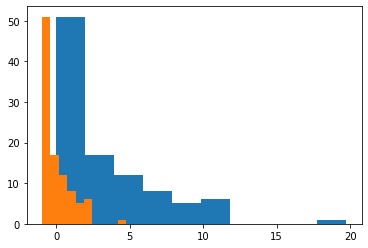

In [34]:
x = np.random.exponential(scale = 3, size = 100)

plt.hist(x)


x_scaled = (x - x.mean())/x.std(ddof = 1)


plt.hist(x_scaled)

__Normalization__

In [36]:
plt.subplot(1)
x_normalized = (x - x.mean())/np.sqrt(x.dot(x))
plt.hist(x)


ValueError: Integer subplot specification must be a three-digit number, not 1

<Figure size 432x288 with 0 Axes>



#### Effect of $\alpha$ in Lasso and Ridge

<img src="lasso_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<img src="ridge_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<a name='questions'></a>


#### Appendix
<a name='appendix'></a>

Here I would like to add some reading material that I found useful while working with the code.


- [pd.get_dummies or OneHotEncoder? - Read second answer](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons)

- [On dummy variable trap](https://www.algosome.com/articles/dummy-variable-trap-regression.html)

- [sklearn.preprocessing.PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- [A great notebook on Lasso and Ridge](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

- [Another good blog post on Lasso and Ridge](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

- Learn.co -- Section-28 Lasso-Ridge

- [Toward Datascience Article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/) 2.2.2 The Bias-Variance Trade-off and 6.2 Shrinkage Methods




Image Sources in order of appearance: 
- https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205


